ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]
[W 2024-12-10 01:11:27,359.359 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992               
[W 2024-12-10 01:11:27,363.363 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC      
[W 2024-12-10 01:11:27,365.365 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:09> EXPO EMM

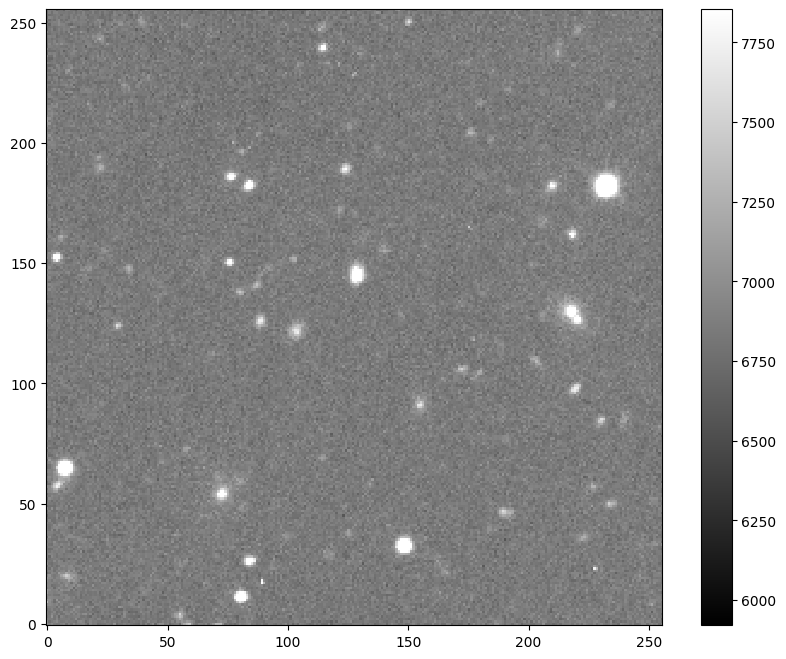

In [1]:
#THIS CELL IS PART OF THE TUTORIAL
import numpy as np
import sep
import astropy.io.fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

#reading the data with astropy instead of fitsio
data = astropy.io.fits.getdata("image.fits")
data

#showing the image
m,s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

#measuring background data
bkg = sep.Background(data)



6852.04931640625
65.46174621582031


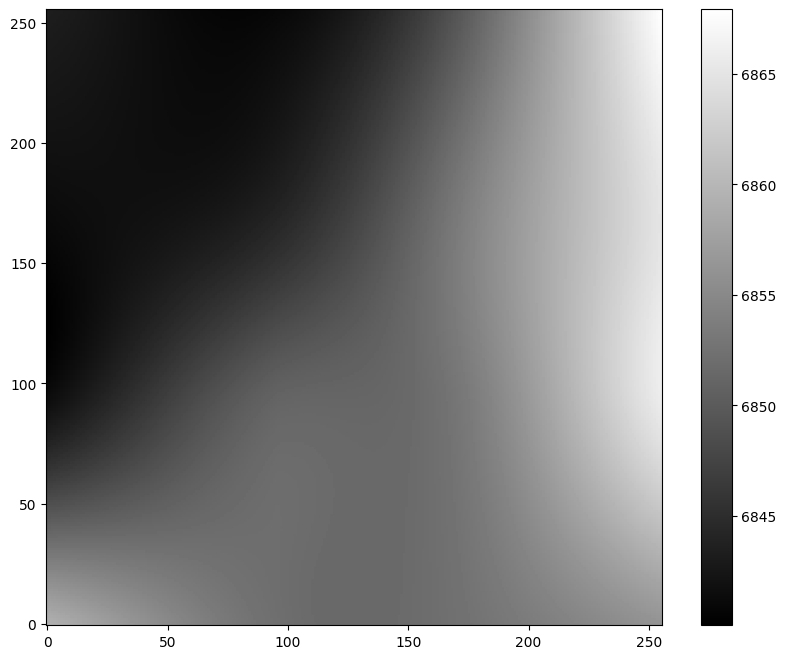

In [2]:
#get global mean and noise of background
print(bkg.globalback)
print(bkg.globalrms)

#evaluate background as 2-D array, same size as the original image
bkg_image = bkg.back()

#showing the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

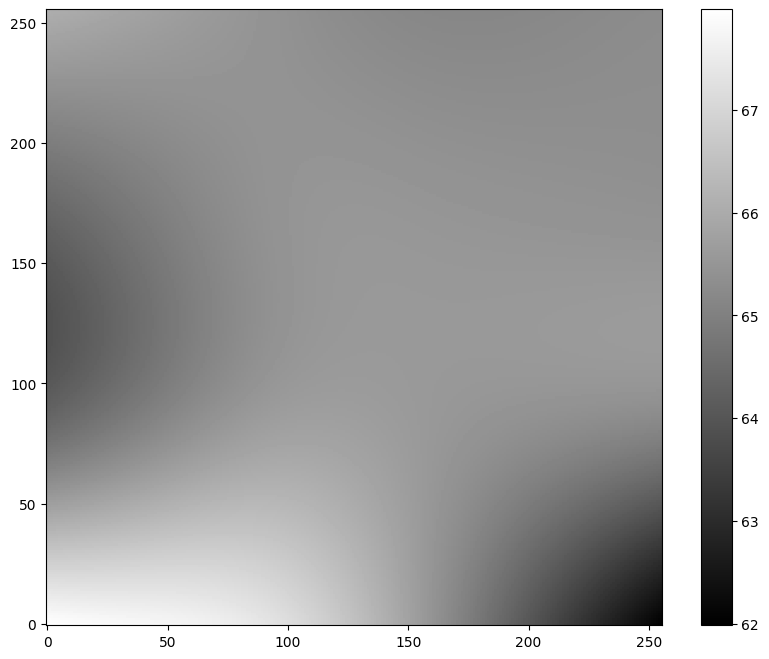

In [3]:
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [4]:
data_sub = data - bkg

#object detection
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
#how many objects were found
len(objects)

69

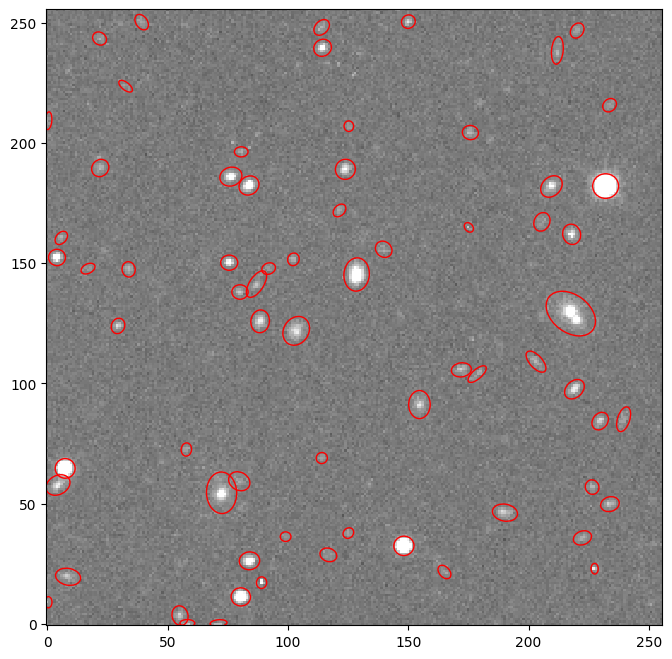

In [5]:
from matplotlib.patches import Ellipse

#plot background subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

#plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [6]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [7]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [8]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


Reading the image data into an array and displaying it 

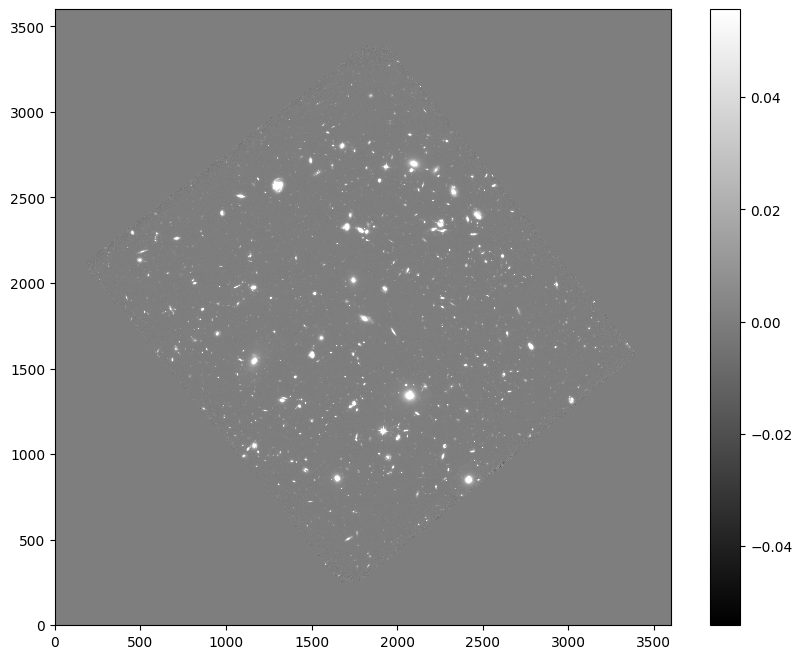

In [30]:
data = astropy.io.fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data
m,s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('projectimage1.png', bbox_inches='tight',pad_inches=0,dpi=600)
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

Estimating background noise and sources, saving the image as png

0.0
0.0005398219218477607


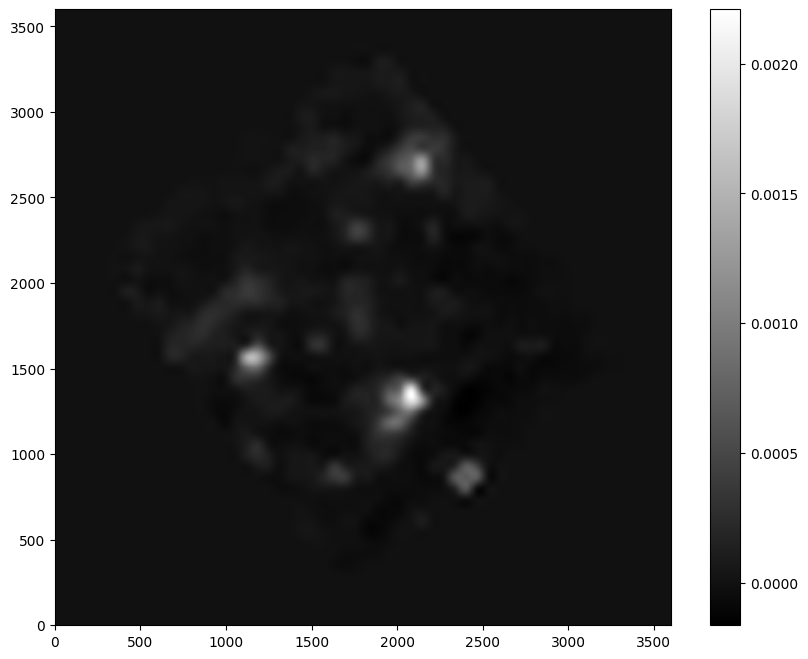

In [10]:
print(bkg.globalback)
print(bkg.globalrms)
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
data_sub = data - bkg
plt.savefig('projectimage2.png', bbox_inches='tight',pad_inches=0,dpi=600)

Evaluating background noise as an array and showing it

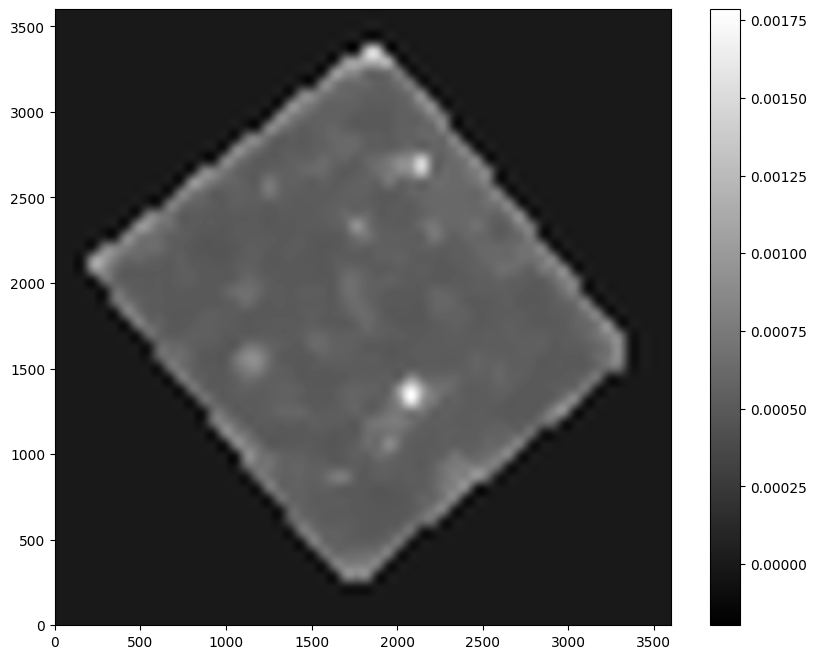

In [27]:
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('projectimage3', bbox_inches='tight',pad_inches=0,dpi=600)
plt.colorbar();

Background noise is now flat, so set detection threshold to constant 1.5 (printing the object count 8643)

In [12]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
len(objects)

8643

Giving centroid coords of objects to check where they are, and plotting over them

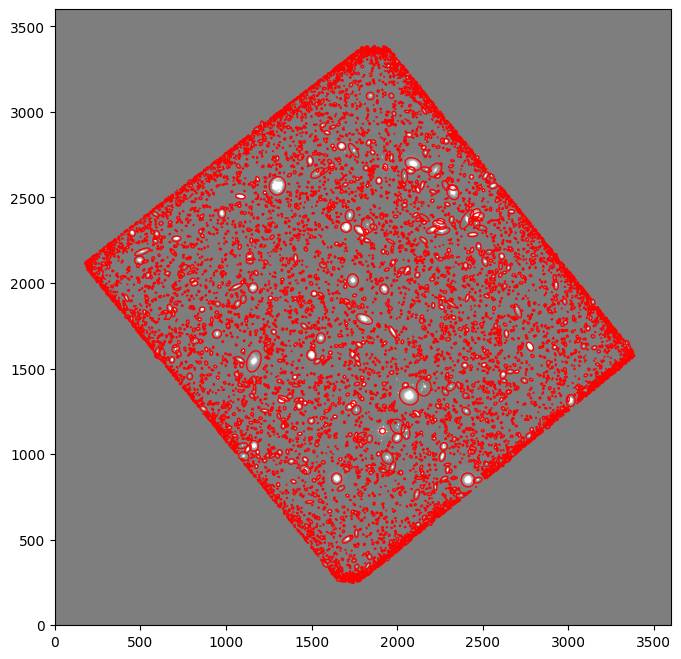

In [28]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
#creating an ellipse for each object 
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('projectimage4', bbox_inches='tight',pad_inches=0,dpi=600)

The list of object attributes

In [14]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

Beginning aperture photometry (3 pixel radius at the locations of objects)

In [15]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

Plotting fluxes on histogram

In [ ]:
#plotting the flux values
plt.hist(-2.5*np.log10(flux),bins=1000, alpha=0.7)
plt.xlabel('-2.5 log10(flux)')
plt.ylabel('N')
#8643 sources given by:
print(len(flux))

Flux mean, median, standard deviation, and calculating outliers

In [17]:
#flux mean
flux_mean = np.mean(flux)
print(flux_mean)

#flux median
flux_median = np.median(flux)
print(flux_median)

#flux standard deviation
flux_std = np.std(flux)
print(flux_std)

outliers = flux - np.mean(flux)

#index of largest value
print(np.argmax(flux))

#largest value in array
print(outliers[2059]) 
print(len(flux))

0.3617466258281149
0.030954822942148894
9.241925555851745
2059
806.9355369473226
8643


The flux distribution has 8643 values, the mean of which is approximately 0.361 and the median approximately 0.03. The standard deviation of the fluxes is 9.2. For my outliers value I subtracted the mean from the flux array and used argmax to find the index of the largest value which was found at[2059], then printed the largest value, being 806.

In [18]:
#ALL OF THE FOLLOWING CELLS ARE FROM LECTURE 18'S EXAMPLE BUT WITH DIFFERENT IMAGE FILES
#define file names
fdata_F105W = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_F125W = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_F160W = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

#read in data
hdu_2 = astropy.io.fits.open(fdata_F105W)
hdu_3 = astropy.io.fits.open(fdata_F105W)
hdu_4 = astropy.io.fits.open(fdata_F105W)

#get the image data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

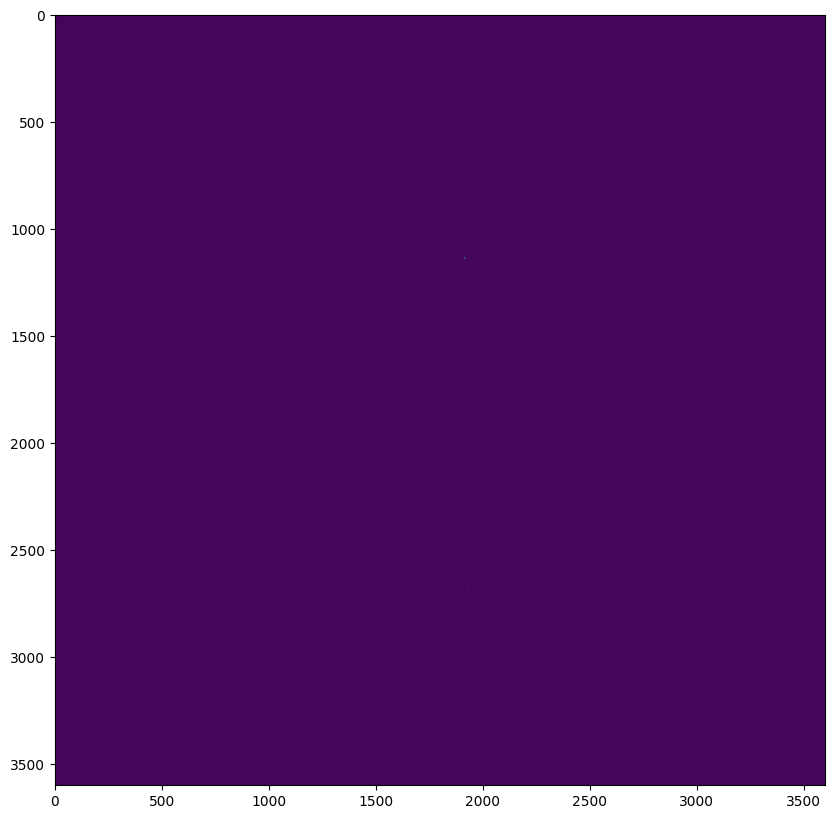

In [19]:
###First do a linear scaling
f = plt.figure(figsize=(10,10))
plt.imshow(data_2)

Rescaling data to be able to see faint objects

In [20]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

Function to plot rescaled data

In [21]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp,vpmin,vpmax = rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin,vmax=vpmax)

Calling that function

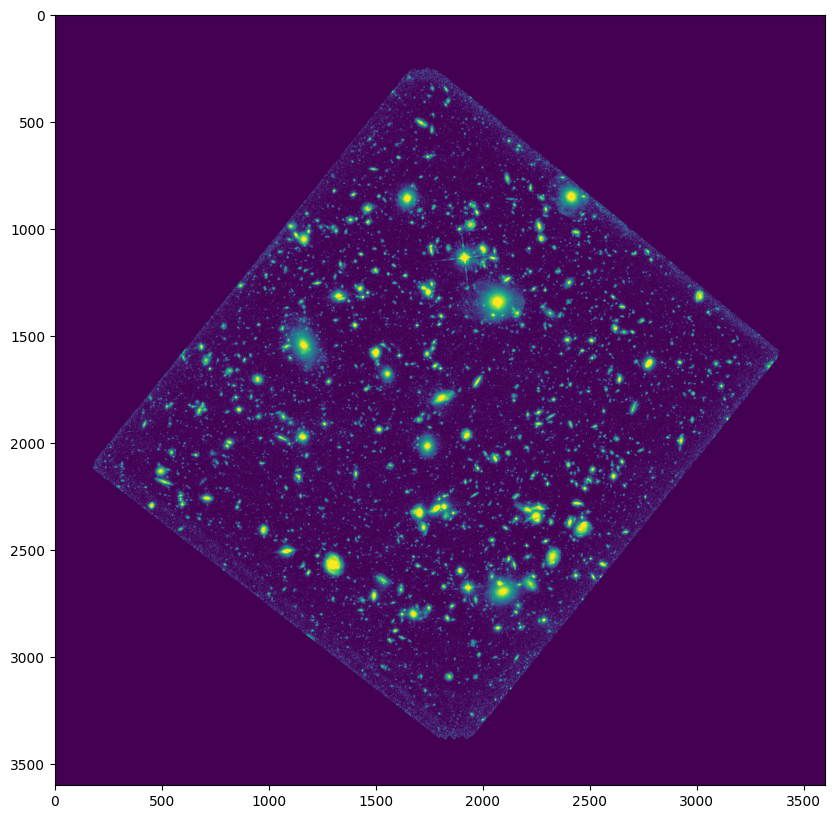

In [22]:
fits_quicklook(data_2)

Preparing data for RGB image

In [23]:
#  USe these rescaled images
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)
data_4_res, d4min, d4max = rescale_image(data_4)

Creating image that is nx by ny by 3 in size, 1 image assigned to R, 1 to G, 1 to B

In [24]:
#Limit the data to be between the min and max values in the rescaling
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d3min] = d3min
data_3_res[data_3_res>d3max] = d3max
data_4_res[data_4_res<d4min] = d4min
data_4_res[data_4_res>d4max] = d4max

In [25]:
#Creating an rgb image, where each image is either R,G, or B
rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min)/(d4max-d4min)

Plotting the final image

[W 2024-12-10 01:11:45,173.173 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


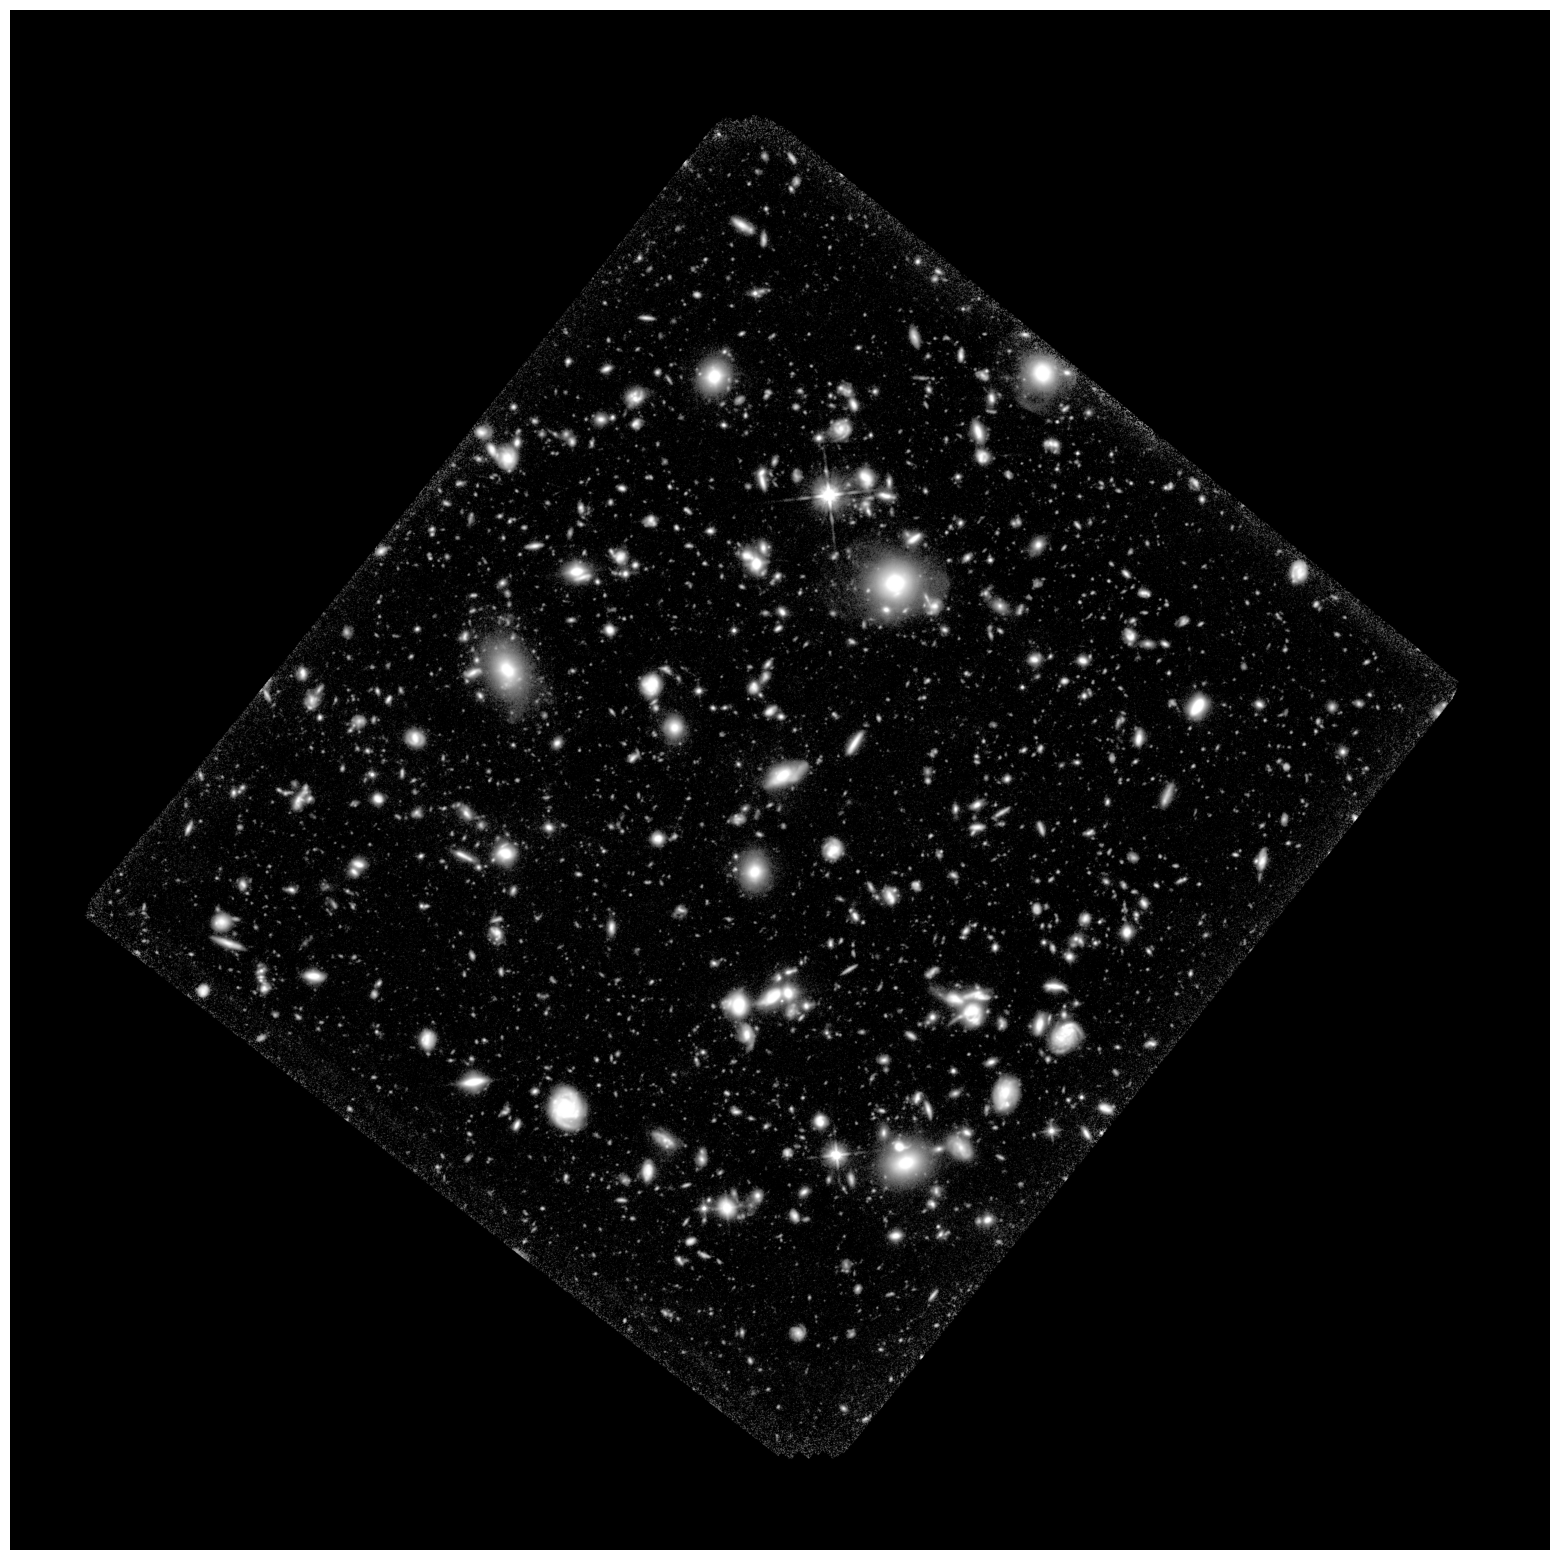

In [26]:
#Plot the image
f,ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('jwst_image.png', bbox_inches='tight',pad_inches=0,dpi=600)